# Calculating Bond Option Adjusted Spread (OAS)

The asset swap spread and the option adjusted spread are widely used as measures of pure credit risk. In this notebook I calculate these quantities. This bond does not have embedded optionality. Hence OAS performs a role of a credit spread.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.bonds.bond import *

####################################################################
#    FINANCEPY Version 1.1 - This build: 27 Aug 2025 at 23:27      #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



In [3]:
issue_dt = Date(15, 5, 2010)
maturity_dt = Date(15, 5, 2027)
coupon = 0.02375
freq_type = FrequencyTypes.SEMI_ANNUAL
dc_type = DayCountTypes.ACT_ACT_ICMA
face = 100.0 # By setting the face to 100 we expect a price of par to be 100.0

In [4]:
bond = Bond(issue_dt, maturity_dt, coupon, freq_type, dc_type)

In [5]:
print(bond)

OBJECT TYPE: Bond
ISSUE DATE: 15-MAY-2010
MATURITY DATE: 15-MAY-2027
COUPON (%): 2.375
FREQUENCY: FrequencyTypes.SEMI_ANNUAL
DAY COUNT TYPE: DayCountTypes.ACT_ACT_ICMA
EX_DIV DAYS: 0


## Option Adjusted Spread

In [6]:
from financepy.market.curves.discount_curve_flat import DiscountCurveFlat

In [7]:
liborFlatRate = 0.0275

In [8]:
settle_dt = Date(21, 7, 2017)

In [9]:
liborFlatCurve = DiscountCurveFlat(settle_dt, liborFlatRate, FrequencyTypes.SEMI_ANNUAL)

To get the OAS I need to know the bond price

In [10]:
clean_price = 99.780842  # I specified face to be 100 - if face is 1 then this must be 0.99780842

OAS is similar to ASW but actually subtly different measure of credit spread with a different definition and compounding annual_frequency. 

In [11]:
bond.option_adjusted_spread(settle_dt, clean_price, liborFlatCurve) * 10000

np.float64(-34.95229384400636)

## Vectorisations

We plot them both as a function of the Bond clean price.

In [12]:
clean_prices = np.linspace(70,130,10)

In [13]:
oass = bond.option_adjusted_spread(settle_dt, clean_prices, liborFlatCurve)

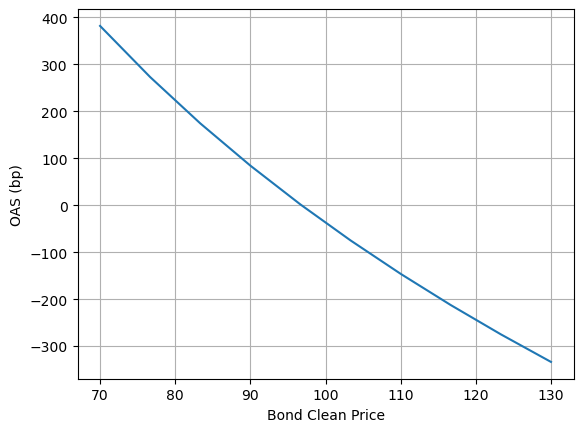

In [14]:
plt.plot(clean_prices,oass*10000)
plt.xlabel("Bond Clean Price")
plt.ylabel("OAS (bp)")
plt.grid()

Copyright (c) 2020 Dominic O'Kane